## Bangkit Final Project: Aksara Jawa Classification with Machine Learning

## Dependencies & Libraries



In [2]:
# Data Prep
import keras,os
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Visualization lib
import pandas as pd
import seaborn as sn
import os
import json
import glob 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Report Metrics 
from sklearn import metrics

# Model Development
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, LeakyReLU, GlobalMaxPooling2D, Activation
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
import datetime
from time import time


## Data Preparation


In [5]:
# Do the image augmentation and rescale image
train_datagen = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    directory="train",
    target_size=(112,112),
    color_mode="grayscale",
    batch_size=20)

validation_data = validation_datagen.flow_from_directory(
    directory="test",
    target_size=(112,112),
    color_mode="grayscale",
    batch_size=20)

Found 2040 images belonging to 20 classes.
Found 480 images belonging to 20 classes.


## Visualize data



In [6]:
image_formats = ["png", "jpg"];

def show_images(image_files):  
    plt.figure() # specifying the overall grid size
    fig = plt.figure(figsize=(10,10))
    fig.patch.set_facecolor('xkcd:gray')
    
    for i in range(len(image_files)):
        plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
        img=mpimg.imread(image_files[i])
        plt.imshow(img)
        plt.tight_layout()
        plt.axis('off')
        plt.title(image_files[i].split("/")[5]) # The name of the character
    
    plt.show()

In [7]:
def list_files(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            if name.endswith(".jpg") or name.endswith(".png"):
              arr.append(os.path.join(root, name))
              break
    return arr

IndexError: list index out of range

<Figure size 640x480 with 0 Axes>

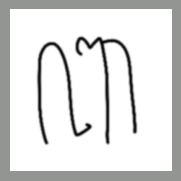

In [8]:
image_list = list_files("train")
show_images(image_list)

In [9]:
def count_files(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        count = 0
        for name in files:
            if name.endswith(".jpg") or name.endswith(".png"):
              count = count + 1
        if count > 0:
          arr.append(count)
    return arr

In [10]:
def get_all_char_names(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        # print(dirs)
        arr.append(dirs)
        break
    return arr

20
[['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']]


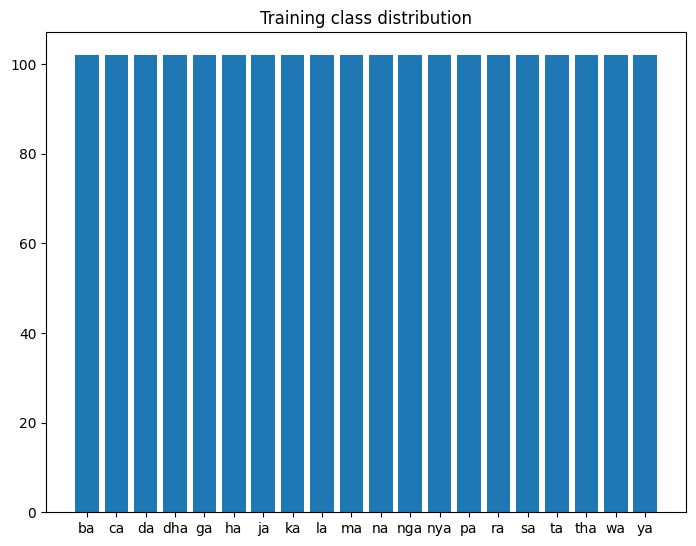

In [11]:
image_count = count_files("train")
print(len(image_count))
chars = get_all_char_names("train")
print(chars)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(chars[0], image_count)
plt.title("Training class distribution")
plt.show()

20
[['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']]


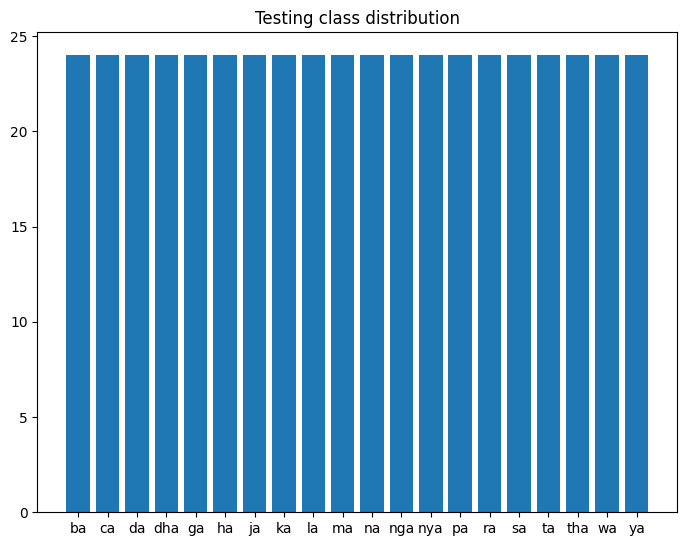

In [12]:
image_count = count_files("test")
print(len(image_count))
chars = get_all_char_names("test")
print(chars)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(chars[0], image_count)
plt.title("Testing class distribution")
plt.show()

## Build the Model



## Use tensor board

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [64]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, 
                                                   histogram_freq=1)
# Clear any logs from previous runs
!rm -rf ./logs/ 

model=Sequential()    
   
model.add(Conv2D(32,(5,5),padding='same',input_shape=(112,112,1)))
model.add(LeakyReLU(alpha=.02))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(.2))

model.add(Conv2D(64,(5,5)))
model.add(LeakyReLU(alpha=.02))    
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(LeakyReLU(alpha=.02))    
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3)))
model.add(LeakyReLU(alpha=.02))    
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.3))

model.add(GlobalMaxPooling2D())  
model.add(Dense(1024))
model.add(LeakyReLU(alpha=.02))
#model.add(Dropout(.3))   

model.add(Dense(512))
model.add(LeakyReLU(alpha=.02))
#model.add(Dropout(.3))

model.add(Dense(256))
model.add(LeakyReLU(alpha=.02))
model.add(Dropout(.4)) 

model.add(Dense(20))
model.add(Activation('softmax'))    

# Compile the model
opt = Adam(lr=0.0001)
model.compile(optimizer=opt,
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

model.summary()

checkpoint = ModelCheckpoint("model.h5", 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             period=1)

early = EarlyStopping(monitor='val_accuracy', 
                      min_delta=0, 
                      patience=30, 
                      verbose=1, 
                      mode='auto')

start=time()
hist = model.fit_generator(steps_per_epoch=100,
                           generator=train_data, 
                           validation_data= validation_data, 
                           validation_steps=5,
                           epochs=100,
                           callbacks=[checkpoint, tensorboard_callback])

print("Model training time = "+str(time()-start))

'rm' is not recognized as an internal or external command,
operable program or batch file.


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 112, 112, 32)      832       
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 64)        51264     
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 52, 52, 64)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 64)       0         
 g2D)                                                 

C:\Users\Dery\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\Dery\AppData\Local\Temp\ipykernel_16304\1757062168.py:66: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=100,


Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 2.9972 - accuracy: 0.0505
Epoch 1: val_accuracy improved from -inf to 0.07000, saving model to model.h5
100/100 [==============================] - 41s 400ms/step - loss: 2.9972 - accuracy: 0.0505 - val_loss: 2.9950 - val_accuracy: 0.0700
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 2.9960 - accuracy: 0.0495
Epoch 2: val_accuracy improved from 0.07000 to 0.11000, saving model to model.h5
100/100 [==============================] - 36s 361ms/step - loss: 2.9960 - accuracy: 0.0495 - val_loss: 2.9924 - val_accuracy: 0.1100
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 2.9912 - accuracy: 0.0550
Epoch 3: val_accuracy did not improve from 0.11000
100/100 [==============================] - 38s 382ms/step - loss: 2.9912 - accuracy: 0.0550 - val_loss: 2.9615 - val_accuracy: 0.0800
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: 2.8007 - accuracy: 0.1140


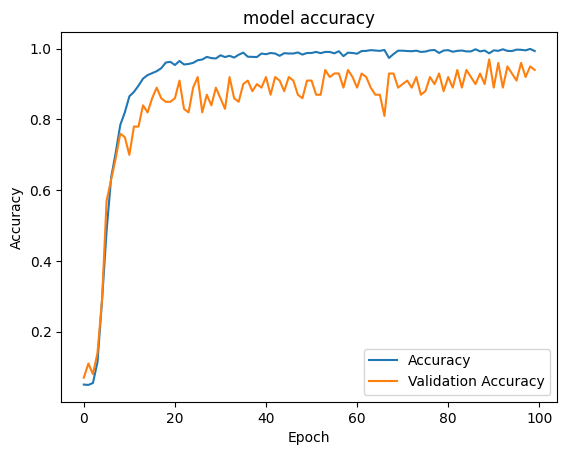

In [77]:
""" Plot the accuracy"""
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

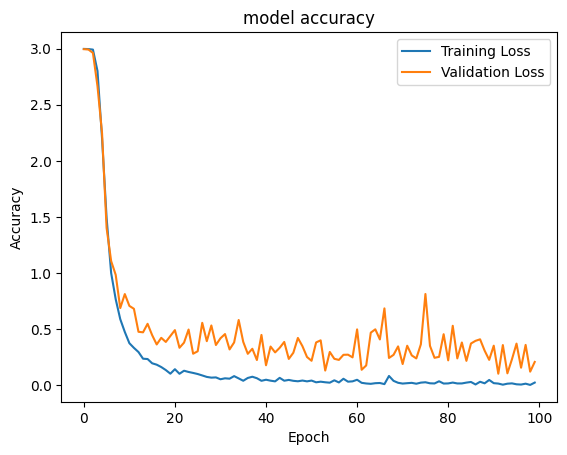

In [78]:
""" Plot the Loss"""
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training Loss","Validation Loss"])
plt.show()

## Try Predict A Single Image

1/1 [==============================] - 0s 130ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
nga


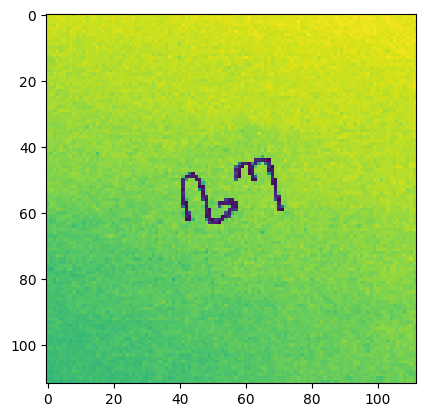

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img = keras.utils.load_img("n.jpg",
                     target_size=(112,112), 
                     color_mode='grayscale')
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=2)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("model.h5")
output = saved_model.predict(img)

max = output[0][0]
pos = 0
for i in range(1, 19): 
    if output[0][i] > max: 
        max = output[0][i]
        pos = i
         
print(output)
print(max)

if (pos == 0) :
    print("ba")
elif (pos == 1) :
    print('ca')
elif (pos == 2) :
    print('da')
elif (pos == 3) :
    print('dha')
elif (pos == 4) :
    print('ga')
elif (pos == 5) :
    print('ha')
elif (pos == 6) :
    print('ja')
elif (pos == 7) :
    print('ka')
elif (pos == 8) :
    print('la')
elif (pos == 9) :
    print('ma')
elif (pos == 10) :
    print('na')
elif (pos == 11) :
    print('nga')
elif (pos == 12) :
    print('nya')
elif (pos == 13) :
    print('pa')
elif (pos == 14) :
    print('ra')
elif (pos == 15) :
    print('sa')
elif (pos == 16) :
    print('ta')
elif (pos == 17) :
    print('tha')
elif (pos == 18) :
    print('wa')
elif (pos == 19) :
    print('ya')

In [80]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    "test", # Put your path here
     target_size=(112, 112),
     color_mode="grayscale",
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, 
                                      steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

Found 480 images belonging to 20 classes.


C:\Users\Dery\AppData\Local\Temp\ipykernel_16304\1553559303.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_data_generator,


In [81]:
report = metrics.classification_report(true_classes, 
                                       predicted_classes, 
                                       target_names = class_labels)
print(report)  
confusion_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
print(confusion_matrix)

              precision    recall  f1-score   support

          ba       0.80      1.00      0.89        24
          ca       1.00      1.00      1.00        24
          da       0.92      1.00      0.96        24
         dha       1.00      0.92      0.96        24
          ga       0.90      0.75      0.82        24
          ha       1.00      0.33      0.50        24
          ja       0.96      1.00      0.98        24
          ka       0.86      1.00      0.92        24
          la       0.65      0.92      0.76        24
          ma       1.00      1.00      1.00        24
          na       1.00      0.75      0.86        24
         nga       0.92      1.00      0.96        24
         nya       1.00      0.75      0.86        24
          pa       1.00      0.92      0.96        24
          ra       0.80      1.00      0.89        24
          sa       1.00      1.00      1.00        24
          ta       0.83      1.00      0.91        24
         tha       1.00    

<Axes: >

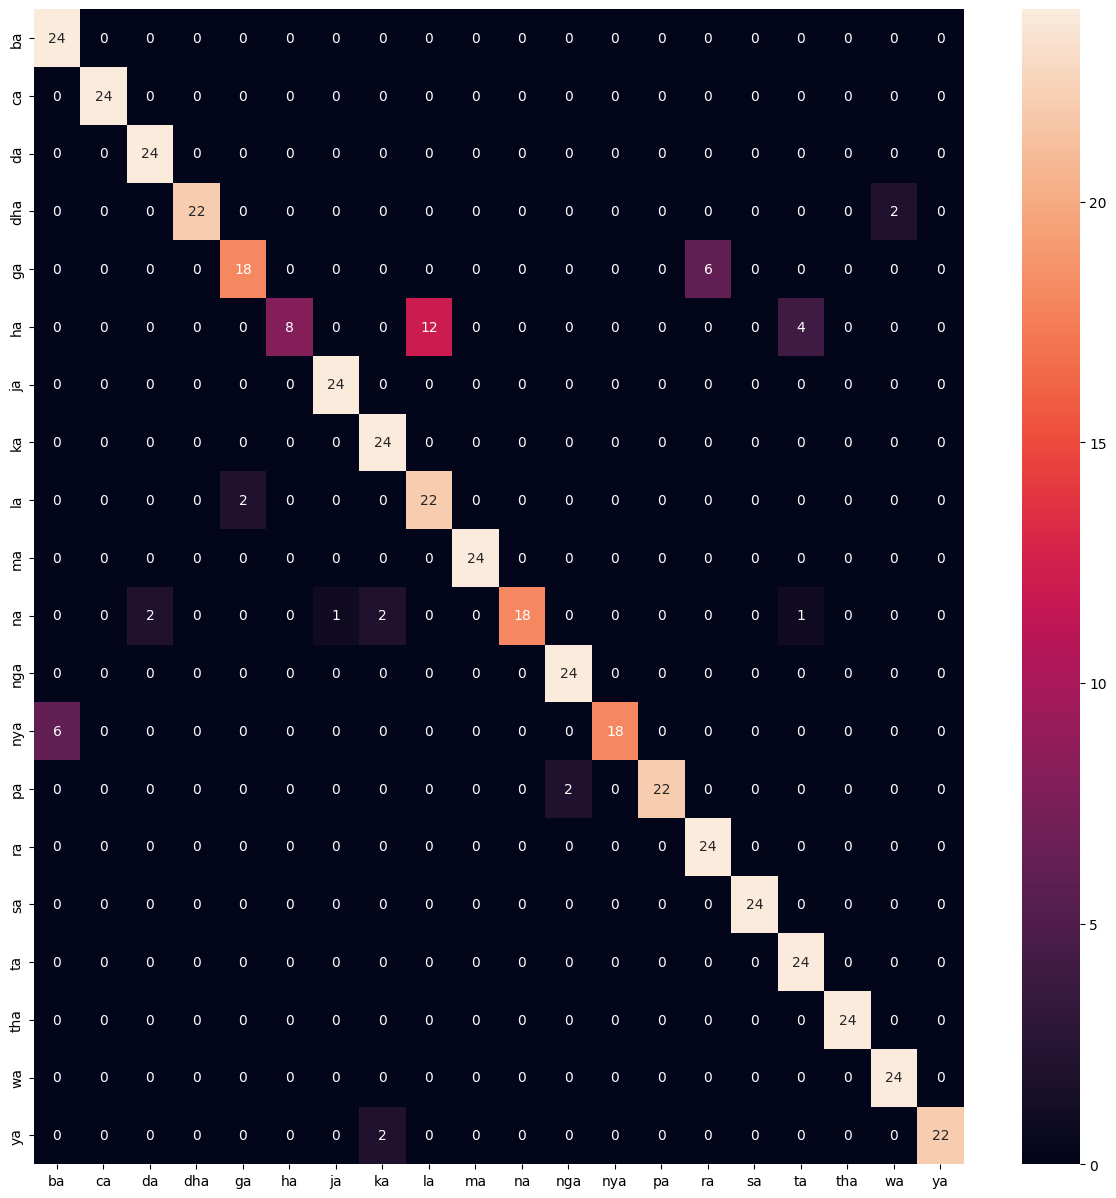

In [82]:
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in ("ba","ca","da","dha",
                                        "ga","ha","ja","ka","la","ma","na","nga",
                                      "nya","pa","ra","sa","ta","tha","wa","ya")],
                  columns = [i for i in ("ba","ca","da","dha","ga","ha","ja","ka",
                                         "la","ma","na","nga","nya","pa","ra","sa",
                                         "ta","tha","wa","ya")])
plt.figure(figsize = (15,15))
sn.heatmap(df_cm, annot=True)